# Background
PT Transportasi Jakarta, Transjakarta is a Bus Rapid Transit (BRT) transportation system which is one of the modes of transportation used by the people of Jakarta.During 2023, Transjakarta make a lot improvements in terms of prices, renovate bus stops, increase the number of bus fleets, add routes and adjust routes.

This capstone project will identify the ideal conditions that Transjakarta must be able to achieve in relation to the improvements that have been carried out in 2023 by Transjakarta itself.



## Problem Identification
The company want to know **How can operational efficiency be improved?**. This information will help the company to know how operational activities can be efficient.

As a *data analyst*, we will try to answer the following questions:

* **Who are the main users of Transjakarta? Who are the key stakeholders ?**

* **What are the most popular routes or bus stops? What are the busiest times of day?**

* **When do peak hours occur? When are delays most common ?**

* **Where are the routes with the highest ridership? Where are the operational challenges?**

# Data Preparation
To answer the questions above, we will analyze transaction data that has been collected by the company.

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

This dataset contains information related to Transjakarta customer transaction data:

1.	transID: Unique transaction id for every transaction
2.	payCardID: Customers main identifier. The card customers use as a ticket for entrance and exit.
3.	payCardBank: Customers card bank issuer name
4.	payCardName: Customers name that is embedded in the card.
5.	payCardSex: Customers sex that is embedded in the card
6.	payCardBirthDate: Customers birth year
7.	corridorID: Corridor ID / Route ID as key for route grouping.
8.	corridorName: Corridor Name / Route Name contains Start and Finish for each route.
9.	direction: 0 for Go, 1 for Back. Direction of the route.
10.	tapInStops: Tap In (entrance) Stops ID for identifying stops name
11.	tapInStopsName: Tap In (entrance) Stops Name where customers tap in.
12.	tapInStopsLat: Latitude of Tap In Stops
13.	tapInStopsLon: Longitude of Tap In Stops
14.	stopStartSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
15.	tapInTime: Time of tap in. Date and time
16.	tapOutStops: Tap Out (Exit) Stops ID for identifying stops name
17.	tapOutStopsName: Tap out (exit) Stops Name where customers tap out.
18.	tapOutStopsLat: Latitude of Tap Out Stops
19.	tapOutStopsLon: Longitude of Tap Out Stops
20.	stopEndSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
21.	tapOutTime: Time of tap out. Date and time
22.	payAmount: The number of what customers pay. Some are free. Some not.
 


Following are the top and bottom 5 rows of the Transjakarta dataset.

In [138]:
df=pd.read_csv('C:/Users/Anthony/Desktop/Purwadhika Capstone Project 2/Transjakarta.csv')
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


## Data Understanding and Cleaning
Before entering into the analysis, we need to know our dataset further in the *data understanding* stage. From this process, we will know what anomalies are in our dataset and need to be handled in the *data cleaning* stage. Every anomaly handled will be accompanied by justification of the steps taken, both in *domain knowledge* and statistically.

In [139]:
print(f'Total rows & columns in dataset df is {df.shape}')
df.info()

Total rows & columns in dataset df is (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  obj

In [140]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [141]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

In general, we can see that:
* Transjakarta dataset has 22 Columns and 37900 Rows
* some columns, namely, `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat` , `tapOutStopsLon` , `stopEndSeq`, `tapOutTime` & `tapOutTime` have empty data. Empty data in these columns is represented by NaN data.
* The `transID` column contains a unique ID for each transaction, so it is not relevant in the analysis and can simply be deleted.
* columns `tapInStopsLat` , `tapInStopsLon` , `tapOutStopsLat` , `tapOutStopsLon` have data of type object. From the explanation, this column should contain numerical data to be able to display the map in the visualization.
* The `payAmount` column contains nan data, this data will be tried to be filled in during the data processing process.

### Missing Value

In [142]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

<Axes: >

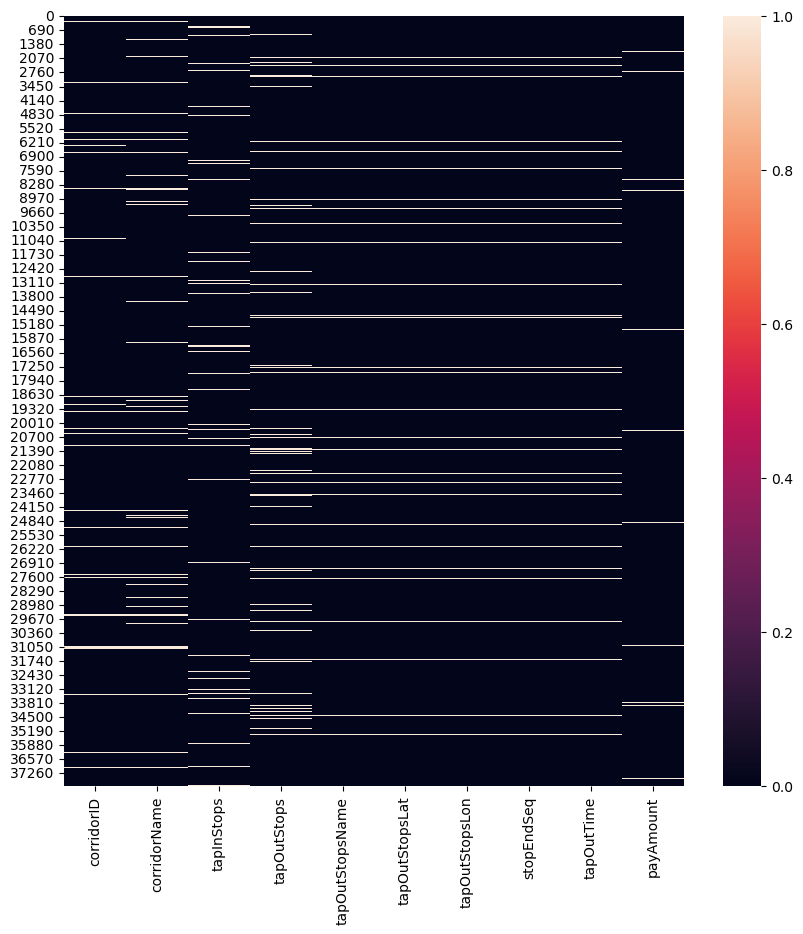

In [143]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime','payAmount']].isna())

Outline:
* *total missing values* 10 Columns
* *missing values* in the `tapOutStops` & `corridorName` columns have a fairly high proportion compared to other columns (>5%)
* *missing values* in the columns `tapOutStopsName` , `tapOutStopsLat` , `tapOutStopsLon` , `tapOutTime` and `stopEndSeq` have a distribution that looks related, if the data in `tapOutStopsName` is empty, then most likely the data in the others is also empty .

There are 2 ways to handle *missing values*:
* first, delete rows/columns that contain *missing values*. This method will be used to delete the `tapOutStops`, `tapInStops`, `corridorID` & `corridorName` columns, because they are still considered quite low and will not affect the analysis (<10%>)
* second, fill in missing data. This method will be used to fill in the `payAmount` column which will be filled in with the mode.

We've seen a rough idea of the anomalies in our data, now, let's look at and treat each anomaly in more detail.

#### Data Cleaning
Now we will carry out the process of removing missing values & input missing values

In [144]:
# Remove rows where 'tapOutStops' or 'corridorName' or 'tapInStops' or 'corridorID' co has missing values
columns_tapoutstops = 'tapOutStops'
columns_tapinstops = 'tapInStops'
columns_corridorName = 'corridorName'
columns_corridorID = 'corridorID'

df = df.dropna(subset=[columns_tapoutstops, columns_tapinstops , columns_corridorID ,columns_corridorName])

# Fill missing values in the 'payAmount' column with its mode
columns_payAmount = 'payAmount'
mode_value = df[columns_payAmount].mode()[0]
df[columns_payAmount].fillna(mode_value, inplace=True)

In [145]:
# persentase missing value di tiap kolom setelah sudah di remove
df.isna().sum()/df.shape[0]*100

transID             0.0
payCardID           0.0
payCardBank         0.0
payCardName         0.0
payCardSex          0.0
payCardBirthDate    0.0
corridorID          0.0
corridorName        0.0
direction           0.0
tapInStops          0.0
tapInStopsName      0.0
tapInStopsLat       0.0
tapInStopsLon       0.0
stopStartSeq        0.0
tapInTime           0.0
tapOutStops         0.0
tapOutStopsName     0.0
tapOutStopsLat      0.0
tapOutStopsLon      0.0
stopEndSeq          0.0
tapOutTime          0.0
payAmount           0.0
dtype: float64

In [146]:
#Change Data Type
columns_changefloat = [ 'tapInStopsLat' , 'tapInStopsLon' , 'tapOutStopsLat' , 'tapOutStopsLon' ]
for column in columns_changefloat:
    df[column] = df[column].astype(int)

## Clean data
We have finished cleaning our data, now, let's take a quick look at the information from the data we have cleaned

In [147]:
# Create an empty list to store column information
listItem = []

# Loop through columns in the DataFrame
for col in df.columns:
    unique_values = df[col].drop_duplicates().values
    num_unique = len(unique_values)
    sample_size = min(2, num_unique)  # Choose a sample size <= 2 or the number of unique values

    listItem.append([
        col,
        df[col].dtype,
        df[col].isna().sum(),
        df[col].nunique(),
        list(unique_values[:sample_size])  # Sample the first 'sample_size' unique values
    ])

# Create the summary DataFrame
dfDesc = pd.DataFrame(
    columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
    data=listItem
)

# Print the shape of the original DataFrame 'df'
print("Original DataFrame Shape:", df.shape)

# Print the summary DataFrame 'dfDesc'
print(dfDesc)

Original DataFrame Shape: (32595, 22)
        dataFeatures dataType  null  unique  \
0   transID           object   0     32595    
1   payCardID         int64    0     1959     
2   payCardBank       object   0     6        
3   payCardName       object   0     1952     
4   payCardSex        object   0     2        
5   payCardBirthDate  int64    0     66       
6   corridorID        object   0     221      
7   corridorName      object   0     216      
8   direction         float64  0     2        
9   tapInStops        object   0     2454     
10  tapInStopsName    object   0     2453     
11  tapInStopsLat     int32    0     1        
12  tapInStopsLon     int32    0     2        
13  stopStartSeq      int64    0     66       
14  tapInTime         object   0     32000    
15  tapOutStops       object   0     2158     
16  tapOutStopsName   object   0     2157     
17  tapOutStopsLat    int32    0     1        
18  tapOutStopsLon    int32    0     2        
19  stopEndSeq        

Before cleaning, we had 37900 rows of data, now we have 32595 rows. Approximately 5305 rows of empty data were deleted, and the remaining empty data was filled with data that was deemed relevant.

# Data Analysis 

We have carried out the data cleaning stage. Now, we can start carrying out analysis to find out **Related to the problem identification that we have created**.

In [148]:
df.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.259500e+04,32595.000000,32595.000000,32595.0,32595.000000,32595.000000,32595.0,32595.000000,32595.000000,32595.000000
mean,4.279358e+17,1990.164811,0.500568,-6.0,106.005584,13.522595,-6.0,106.007026,21.169351,2742.337782
std,1.325782e+18,13.020913,0.500007,0.0,0.074516,12.166355,0.0,0.083525,13.773718,4195.090494
min,6.040368e+10,1946.000000,0.000000,-6.0,106.000000,0.000000,-6.0,106.000000,1.000000,0.000000
25%,1.800407e+14,1982.000000,0.000000,-6.0,106.000000,4.000000,-6.0,106.000000,11.000000,0.000000
50%,3.507251e+15,1990.000000,1.000000,-6.0,106.000000,10.000000,-6.0,106.000000,18.000000,3500.000000
75%,4.704902e+15,2001.000000,1.000000,-6.0,106.000000,19.000000,-6.0,106.000000,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.0,107.000000,68.000000,-6.0,107.000000,77.000000,20000.000000


## Who are the main users of Transjakarta?

First, who are Transjakarta customers.

* Age distribution of Transjakarta customers?
* Gender distribution of Transjakarta customers?
* Domicile of origin of Transjakarta customers?

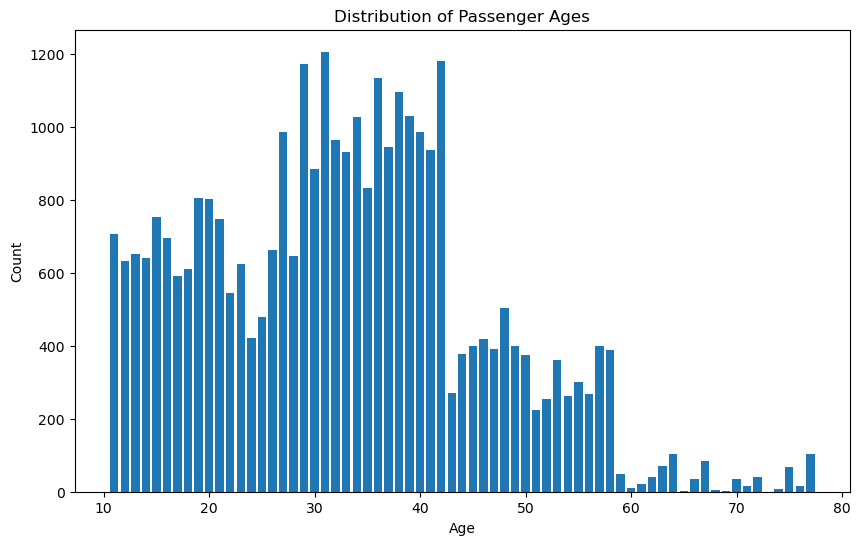

In [149]:
# 1. Age Analysis
age = 2023 - df['payCardBirthDate']
age_counts = age.value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Passenger Ages')
plt.show()

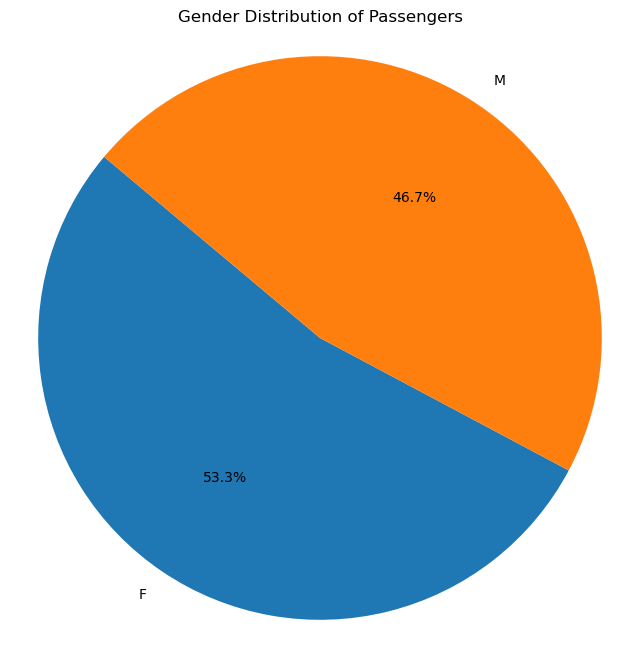

In [150]:
# 2. Gender Analysis
gender_counts = df['payCardSex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Passengers')
plt.axis('equal')
plt.show()

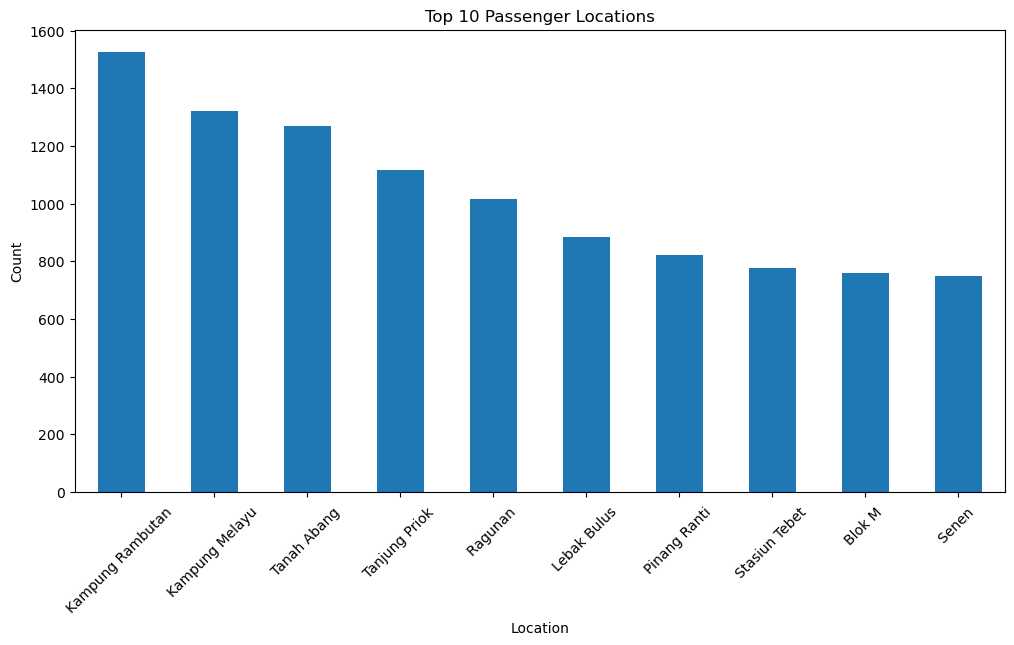

In [151]:
# 3. Location Analysis
df['location'] = df['corridorName'].str.split('-').str[0]
location_counts = df['location'].value_counts().head(10)  # Display top 10 locations
plt.figure(figsize=(12, 6))
location_counts.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Top 10 Passenger Locations')
plt.xticks(rotation=45)
plt.show()

With the graph above we can answer some of the questions above:
* Age distribution of Transjakarta customers? Transjakarta customers are dominated by those aged 25 - 40 years
* Gender distribution of Transjakarta customers? Transjakarta customers are dominated by female customers with a percentage of 53.3%
* Domicile of Transjakarta customer origin? Transjakarta customers mostly come from East Jakarta, West Jakarta & North Jakarta

## What are the most popular routes or bus stops? What are the busiest times of day?


Second, what are the popular routes on Transjakart & the busiest times?

* Popular route analysis?
* Popular bus stops?
* Busiest time of day?

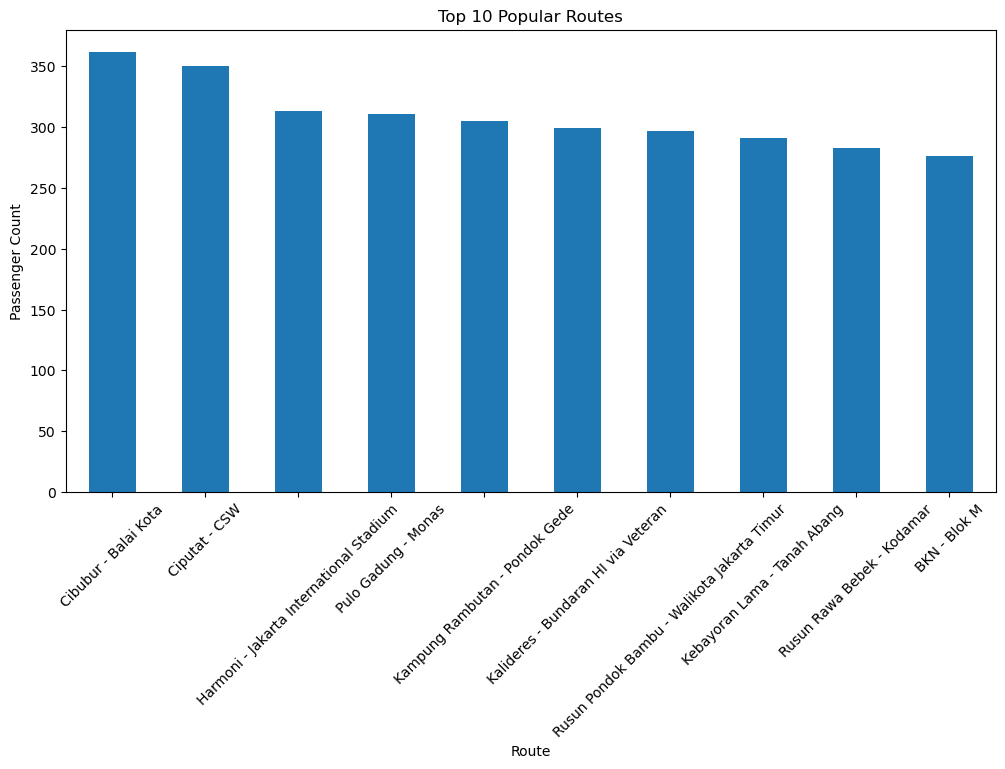

In [152]:
# 1. Popular Routes Analysis
popular_routes = df['corridorName'].value_counts().head(10)  # Display top 10 routes
plt.figure(figsize=(12, 6))
popular_routes.plot(kind='bar')
plt.xlabel('Route')
plt.ylabel('Passenger Count')
plt.title('Top 10 Popular Routes')
plt.xticks(rotation=45)
plt.show()

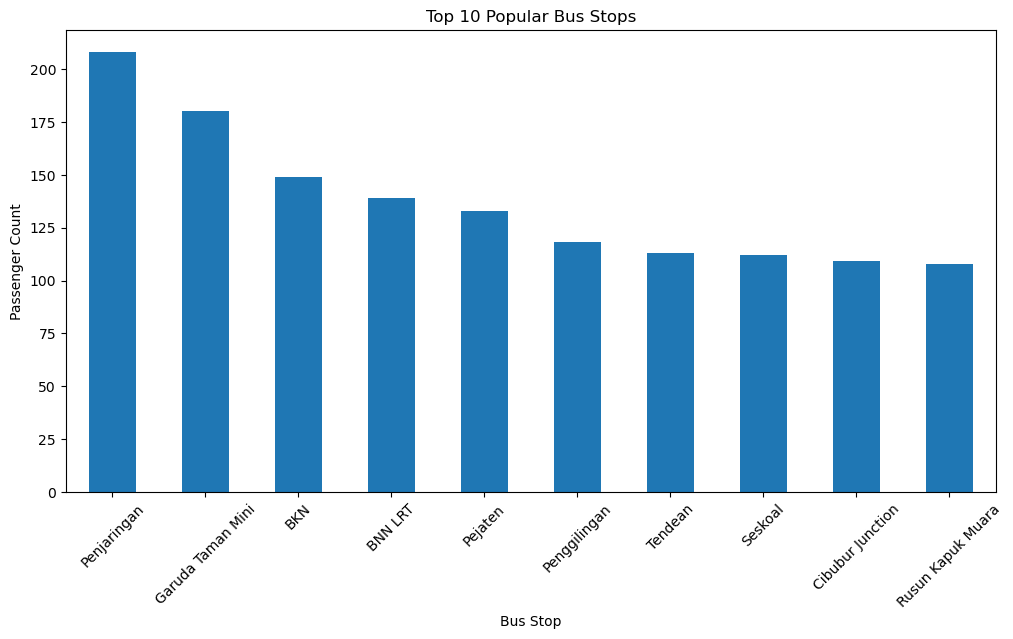

In [153]:
# 2. Popular Bus Stops Analysis
popular_bus_stops = df['tapInStopsName'].value_counts().head(10)  # Display top 10 bus stops
plt.figure(figsize=(12, 6))
popular_bus_stops.plot(kind='bar')
plt.xlabel('Bus Stop')
plt.ylabel('Passenger Count')
plt.title('Top 10 Popular Bus Stops')
plt.xticks(rotation=45)
plt.show()

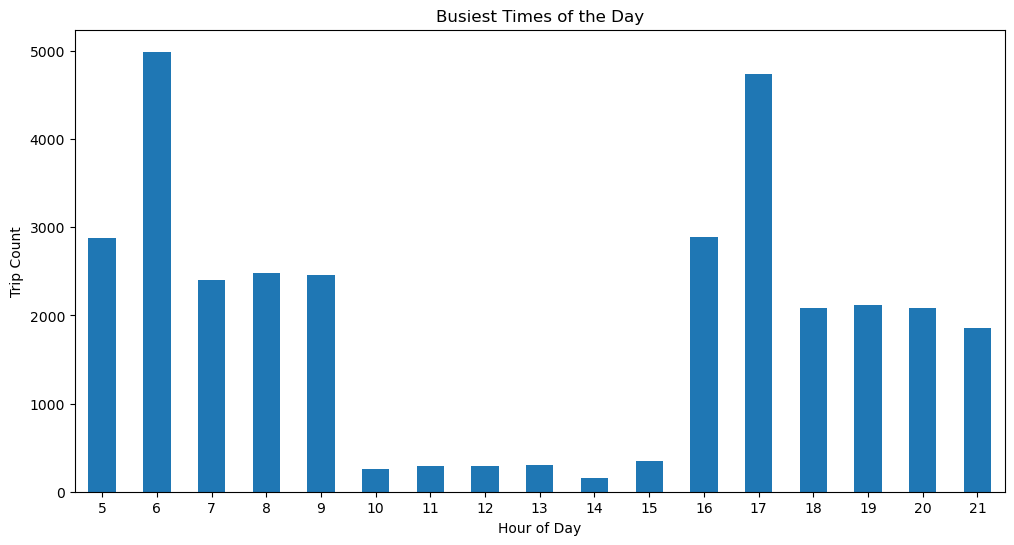

In [154]:
# 3. Busiest Times of the Day Analysis
# Convert the 'timestamp' column to datetime if it's not already
df['tapInTime'] = pd.to_datetime(df['tapInTime'])

# Extract the hour from the timestamp
df['hour'] = df['tapInTime'].dt.hour

# Group data by the hour and count the number of trips in each hour
hourly_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Count')
plt.title('Busiest Times of the Day')
plt.xticks(rotation=0)
plt.show()

With the graph above we can answer some of the questions above:

* Popular route analysis? Cibubur - City Hall which is the busiest route owned by Transjakarta
* Popular bus stops? The most stops are in Penjaringan
* Busiest time of day? The busiest times are 6 am & 5 pm

## When do peak hours occur? When are delays most common?

Third, what are the peak hours and delays that occur in the existing corridor?

* Peak hours are seen from the customer's exit time?
* What is the lead time that occurs during the trip?
* Most Travel Time Coridor?

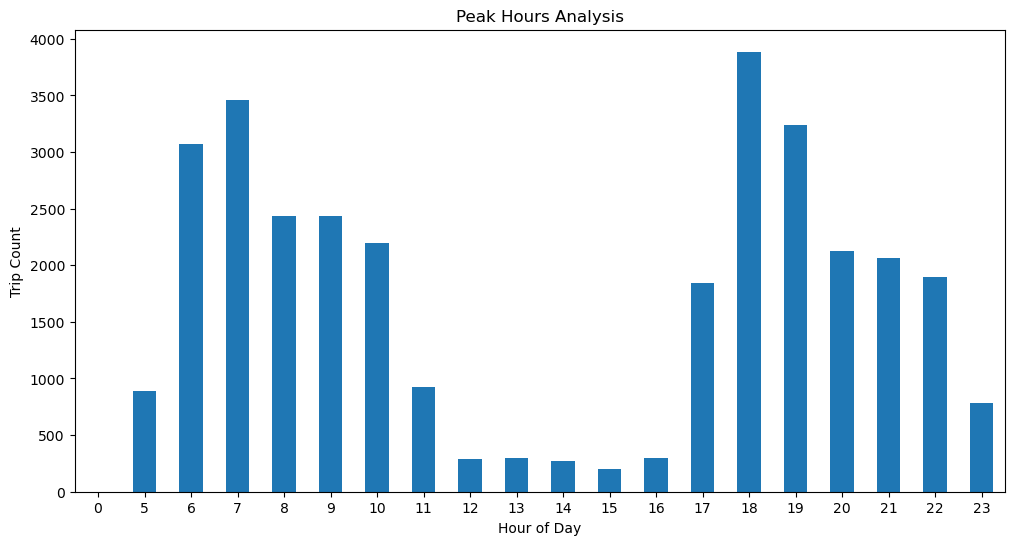

In [155]:
# 1. Peak Hours Analysis
# Convert the 'timestamp' column to datetime if it's not already
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

# Extract the hour from the timestamp
df['hour'] = df['tapOutTime'].dt.hour

# Group data by the hour and count the number of trips in each hour
hourly_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Count')
plt.title('Peak Hours Analysis')
plt.xticks(rotation=0)
plt.show()

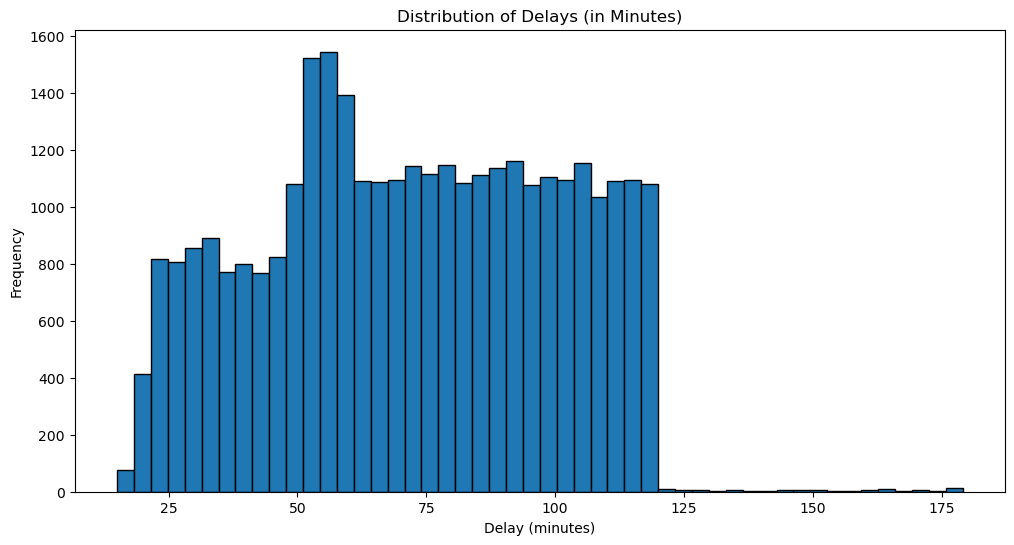

In [156]:
# 2. Delays Analysis by Minute
# Calculate the delay for each trip in minutes by subtracting departure_time from arrival_time
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])
df['delay_minutes'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60.0

# Filter out trips with negative delays (no delay) and calculate statistics
positive_delays = df[df['delay_minutes'] > 0]['delay_minutes']

plt.figure(figsize=(12, 6))
plt.hist(positive_delays, bins=50, edgecolor='k')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Delays (in Minutes)')
plt.show()


In [157]:
# 3. Average Corridor Route Time
# Change the time column to datetime type
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

# Calculate trip duration for each trip in minutes
df['travel_duration_minutes'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60

# Calculate average travel time by corridor
average_travel_duration_by_corridor = df.groupby('corridorName')['travel_duration_minutes'].mean()

# Sort the corridors by average travel time in descending order
corridor_average_sorted = average_travel_duration_by_corridor.sort_values(ascending=False)

# Select the top 10 corridors with the highest average travel time
top_10_average_corridors = corridor_average_sorted.head(10)

# Print the top 10 Average corridors Time
print("Top 10 Corridors with the Highest Average Travel Time:")
print(top_10_average_corridors)

Top 10 Corridors with the Highest Average Travel Time:
corridorName
Kampung Rambutan - Blok M                 83.659375
Cinere - Kuningan                         82.890889
Stasiun Palmerah - Tosari                 81.617258
Rusun Pinus Elok - Rusun Pulo Gebang      81.610333
Senen - Pulo Gadung via Kelapa Gading     80.222797
Rawamangun - Klender                      80.000813
Puri Kembangan - Sentraland Cengkareng    79.724459
Grogol - Tubagus Angke                    79.714198
Pinang Ranti - Bundaran Senayan           79.413580
Kelapa Gading - Rusun Kemayoran           78.695550
Name: travel_duration_minutes, dtype: float64


With the graph above we can answer some of the questions above:

* Peak hours are seen from the customer's exit time? 7 - 8 am & 6 - 7 pm
* What is the lead time that occurs during the trip? 50 - 60 minutes
* Most Travel Time Coridor ? Kampung Rambutan - Blok M 83 Minutes Delay

## Where are the routes with the highest ridership? Where are the operational challenges?


Fourth, where are the routes most used by customers and payment gates?

* What stops do customers get off the most?
* Payment made by the customer?

The most common stopEndSeq is: 12.0


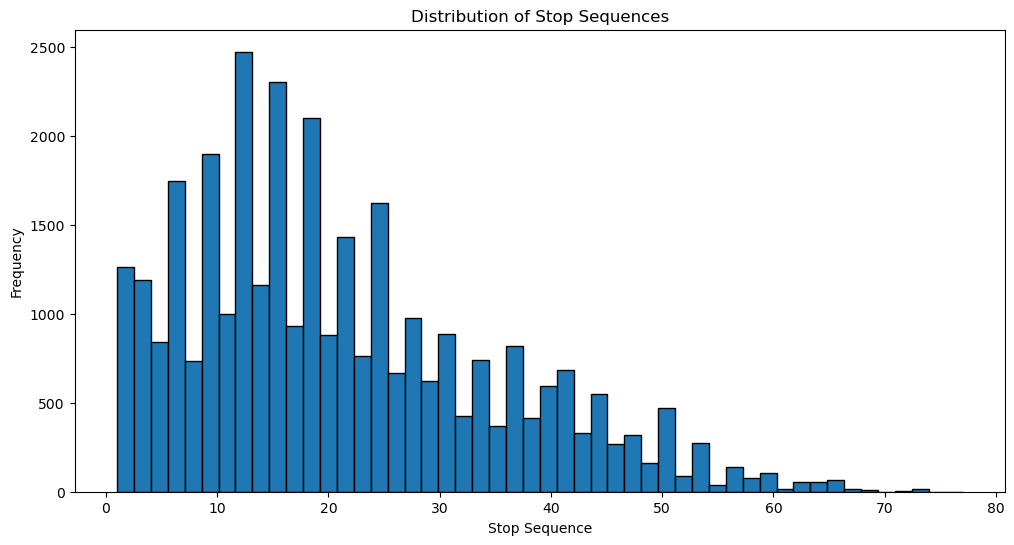

In [158]:
# 1. Highest Ridership Stop Sequences 
# Find the most common value in the 'stopEndSeq' column
most_common_stop_end_seq = df['stopEndSeq'].value_counts().idxmax()
print("The most common stopEndSeq is:", most_common_stop_end_seq)

# Create a histogram to visualize the distribution of 'stopEndSeq'
plt.figure(figsize=(12, 6))
plt.hist(df['stopEndSeq'], bins=50, edgecolor='k')
plt.xlabel('Stop Sequence')
plt.ylabel('Frequency')
plt.title('Distribution of Stop Sequences')
plt.show()

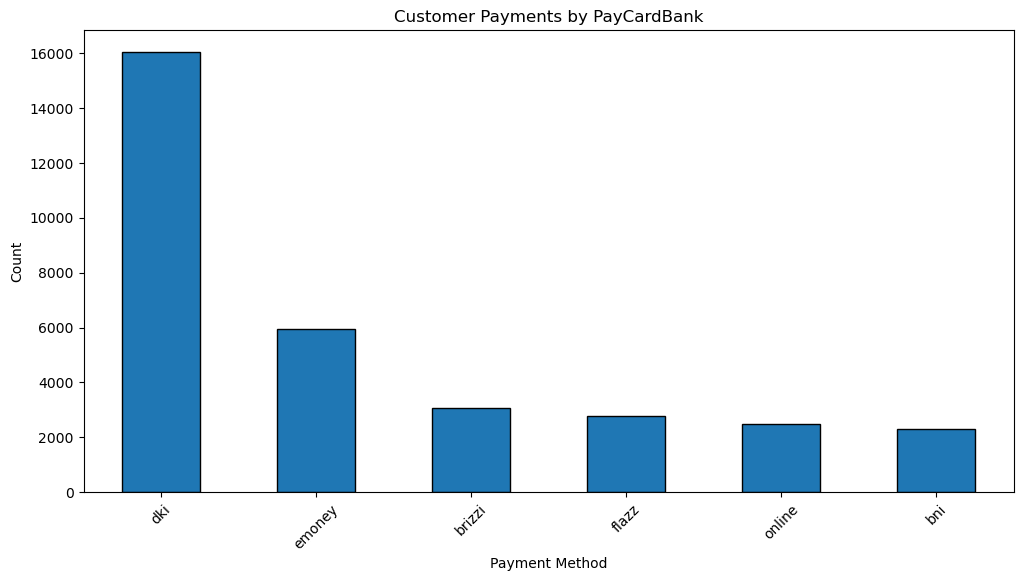

In [159]:
# 2. Payment Transaction 
# Group the data by 'payCardBank' and count occurrences
payment_counts = df['payCardBank'].value_counts()

# Create a bar chart to visualize customer payments by payCardBank
plt.figure(figsize=(12, 6))
payment_counts.plot(kind='bar', edgecolor='k')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Customer Payments by PayCardBank')
plt.xticks(rotation=45)
plt.show()

With the graph above we can answer some of the questions above:

* What stops do customers get off the most? 12 stops Sequences
* Payment made by the customer? DKI Bank

# Conclusion & Recommendation

## Conclusion

Conclusions - Customer Behavior:

* 1. Customer Demographics: The majority of Transjakarta customers fall into the age group of 25 to 40 years, with a slight female majority (53.3%). This suggests a diverse customer base.
* 2. Origin of Customers: Most Transjakarta customers originate from East Jakarta, West Jakarta, and North Jakarta, indicating the importance of these areas in the network.
* 3. Peak Hours: The busiest times of day for Transjakarta are 6 am and 5 pm, aligning with typical rush hours.
* 4. Peak Exit Hours: Peak exit times are seen from 7 am to 8 am and 6 pm to 7 pm, indicating when most passengers complete their journeys.
* 5. Payment Methods: Customers predominantly use DKI Bank for payment.


Conclusions - Transjakarta Operational Improvements:

* 1. Popular Routes: The most popular and busiest route is "Cibubur - City Hall," indicating high demand for this corridor.
* 2. Busiest Bus Stops: The bus stop with the highest number of transactions is in Penjaringan, indicating high passenger traffic.
* 3. Travel Time: The average travel time for Transjakarta trips is around 50 to 60 minutes.
* 4. Corridor Analysis: "Kampung Rambutan - Blok M" is the corridor with the highest average travel time, suggesting potential operational challenges.
* 5. Common Exit Stops: The majority of customers exit after 12 stops, which could be used to optimize services.

## Recommendations

Recommendations - Customer Behavior:

* 1. Customer Engagement: Transjakarta can conduct surveys and gather feedback from customers to better understand their preferences, needs, and pain points. This information can be used to tailor services and communication to customer preferences.
* 2. Promotional Campaigns: To attract more diverse customer groups, Transjakarta can launch promotional campaigns targeted at different age groups, genders, and regions within Jakarta.
* 3. Peak Hour Education: Educate customers about alternative routes or times to alleviate congestion during peak hours, spreading the load across the day.
* 4. Payment Options: Transjakarta can explore partnerships with other banks and payment providers to offer customers more payment options, increasing convenience and accessibility.


Recommendations - Transjakarta Operational Improvements:

* 1. Route Optimization: Given the popularity of certain routes and bus stops, Transjakarta can consider optimizing schedules and increasing frequency on these routes during peak hours to reduce congestion and improve service quality.
* 2. Operational Efficiency: Addressing delays on the "Kampung Rambutan - Blok M" corridor can improve customer satisfaction. Analyzing the causes of delays and implementing solutions, such as better traffic management or route adjustments, can be beneficial.
* 3. Infrastructure Development: Consider investing in infrastructure improvements, such as dedicated bus lanes and modernized bus stops, to enhance the overall experience for customers.
* 4. Safety and Security: Enhance safety measures and security on Transjakarta buses and at bus stops to create a safer environment for passengers.
* 5. Accessibility: Ensure that Transjakarta services are accessible to people with disabilities and elderly passengers.